# Setup

In [1]:
import math

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Set random seed.
np.random.seed(0)

# Utils

In [2]:
# Expoenential model.
def exp_model(x):
    return 233.846 * (1 - math.exp(-0.006042 * x))


def fnn(k=128, learning_rate=0.001, activation='tanh'):
    model = Sequential()
    sgd = Adam(learning_rate=learning_rate)
    model.add(Dense(k, input_dim=1, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=sgd)

    return model

# Data

In [3]:
# Features.
X = [15,15,15,18,28,29,37,37,44,50,50,60,61,64,65,65,72,75,75,82,85,91,91,97,98,125,142,142,147,147,150,159,165,183,192,195,218,218,219,224,225,227,232,232,237,246,258,276,285,300,301,305,312,317,338,347,354,357,375,394,513,535,554,591,648,660,705,723,756,768,860]
# Target.
y = [21.66,22.75,22.3,31.25,44.79,40.55,50.25,46.88,52.03,62.47,61.13,81,73.90,79.09,79.51,65.31,71.9,86.1,94.6,92.5,105,101.7,102.9,110,104.3,134.9,130.68,140.58,155.3,152.2,144.5,142.15,139.81,153.22,145.72,161.1,174.18,173.03,173.54,178.86,177.68,173.73,159.98,161.29,187.07,176.13,183.4,186.26,189.66,189.09,186.7,186.8,195.1,216.41,203.23,188.38,189.7,195.31,202.63,224.82,203.3,209.7,233.9,234.7,244.3,231,242.4,230.77,242.57,232.12,246.7]

# Exponential model predictions.
y_exp = [exp_model(x) for x in X]

X = np.array(X).reshape((71, 1))
y = np.array(y).reshape((71, 1))
y_exp = np.array(y_exp).reshape((71, 1))

# Feed Forward Neural Network

In [4]:
# Instantiation.
model = fnn(k=128)
# Fit.
history = model.fit(X, y, epochs=500, batch_size=4, verbose=0)

y_nn = model.predict(X)

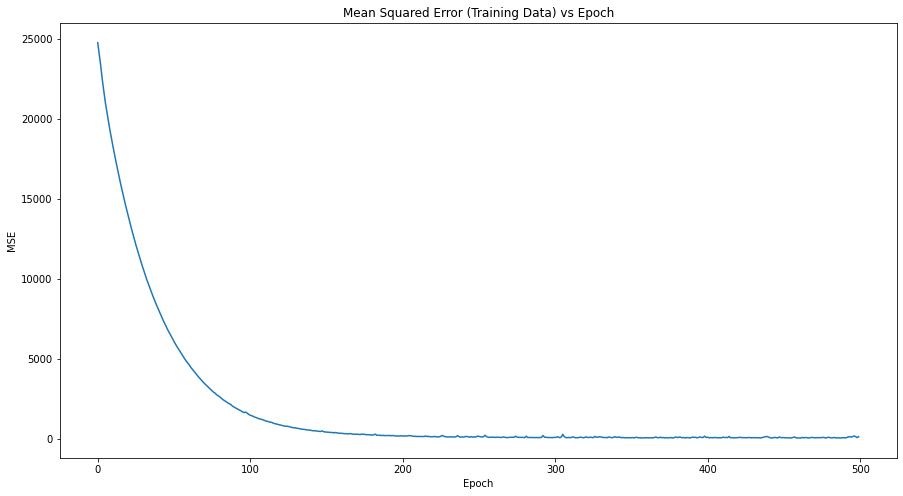

MSE (Training Data) 98.81524876671948


In [5]:
# MSE vs Epoch.
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error (Training Data) vs Epoch')
plt.show()

# MSE (Training Data).
print("MSE (Training Data)", mean_squared_error(y, y_nn))

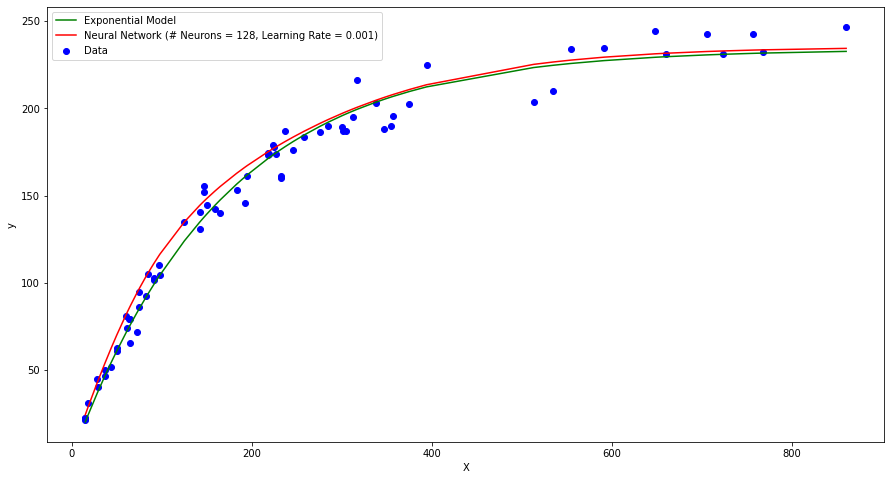

In [6]:
# Models.
plt.figure(figsize=(15, 8))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_exp, color='green', label='Exponential Model')
plt.plot(X, y_nn, color='red', label='Neural Network (# Neurons = 128, Learning Rate = 0.001)')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Impact of Learning Rate

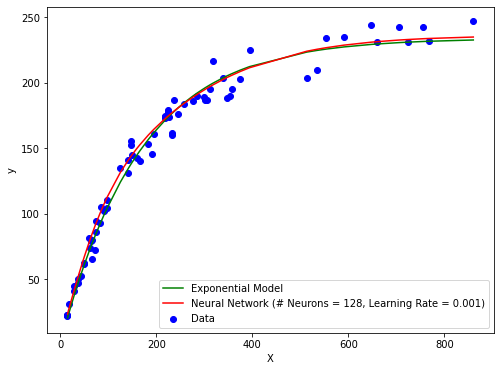

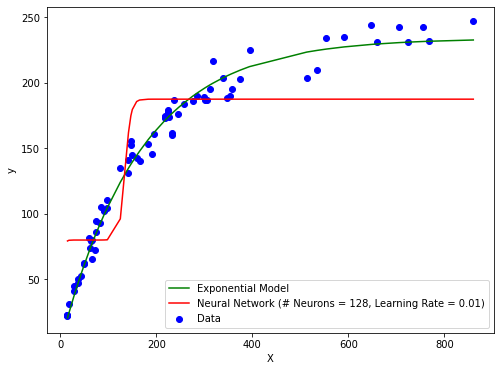

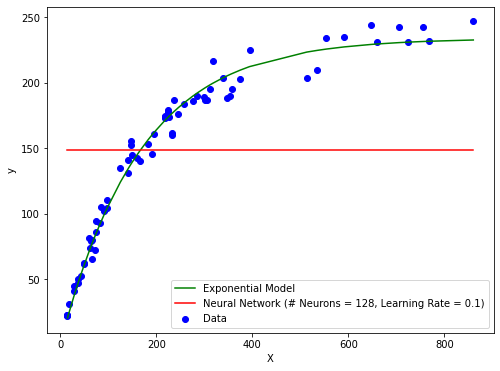

In [7]:
# Learning Rates. 
L = [0.001, 0.01, 0.1]

error = []
for l in L:
    # Model.
    # Instantiation.
    model = fnn(k=128, learning_rate=l)
    #Fit.
    history = model.fit(X, y, epochs=500, batch_size=4, verbose=0)

    preds = model.predict(X)

    error.append(mean_squared_error(y, preds))

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_exp, color='green', label='Exponential Model')
    plt.plot(X, preds, color='red', label=f'Neural Network (# Neurons = 128, Learning Rate = {l})')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

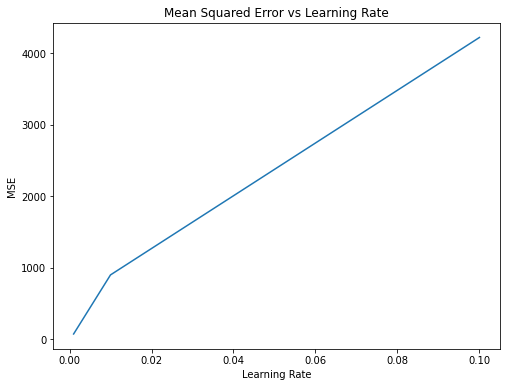

In [8]:
# Mean Squared Error vs Learning Rate.
plt.figure(figsize=(8, 6))
plt.plot(L, error)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Mean Squared Error vs Learning Rate')
plt.show()

## Impact of Neurons in Hidden Layer

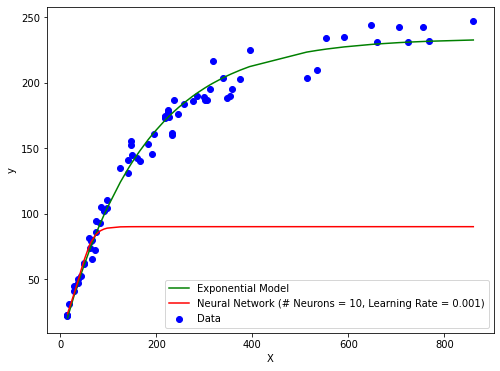

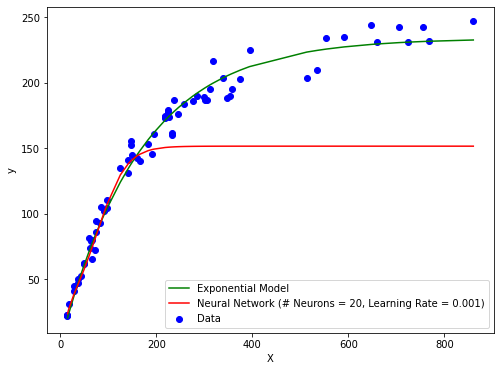

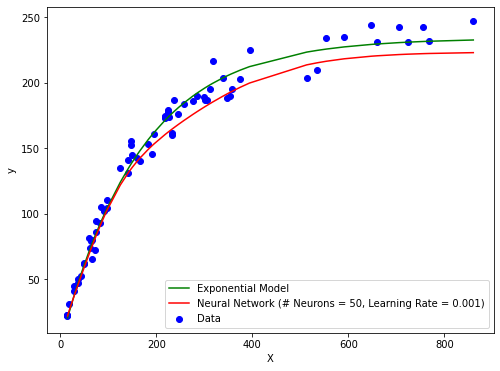

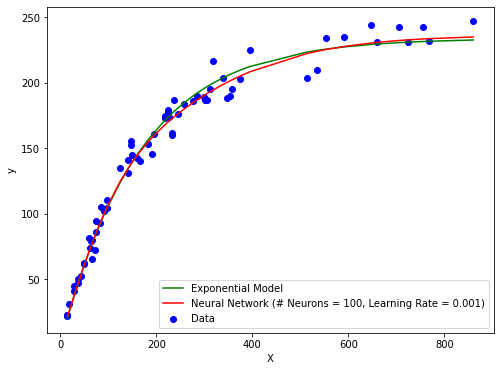

In [9]:
# Number of neurons.
K=[10, 20, 50, 100]

error=[]
for k in K:
    # Model.
    # Instantiation.
    model = fnn(k=k, learning_rate=0.001)
    # Fit.
    history = model.fit(X, y, epochs=500, batch_size=4, verbose=0)

    preds = model.predict(X)

    error.append(mean_squared_error(y, preds))

    plt.figure(figsize=(8, 6))  
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_exp, color='green', label='Exponential Model')
    plt.plot(X, preds,color='red', label=f'Neural Network (# Neurons = {k}, Learning Rate = 0.001)')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

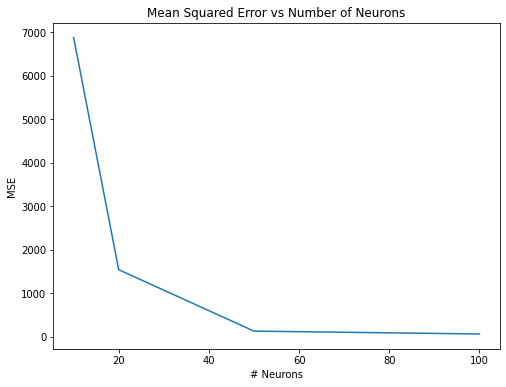

In [10]:
# Mean Squared Error vs Number of Neurons.
plt.figure(figsize=(8, 6))
plt.plot(K, error)
plt.xlabel('# Neurons')
plt.ylabel('MSE')
plt.title('Mean Squared Error vs Number of Neurons')
plt.show()